In [1]:
%matplotlib inline
from training_tools.train_models import train_models
from training_tools.evaluate_models import evaluate_models
from training_tools.helpers.plotting import load_results, plot_metrics
from training_tools.normalize_and_align_models import normalize_and_align_vectors
from training_tools.helpers.plotting import load_results, plot_metrics
from training_tools.w2v_model import W2VModel
from training_tools.helpers.cosine_similarity_time_series import cosine_similarity_over_years
from training_tools.helpers.weat_time_series import compute_weat_over_years

In [5]:
model1 = W2VModel("/vast/edk202/NLP_corpora/Google_Books/20200217/eng-fiction/5gram_files/6corpus/yearly_files/models_final/norm_and_align/w2v_y2018_wbdoc_freq_vs200_w5_mc40_sg1_e8.kv")
model2 = W2VModel("/vast/edk202/NLP_corpora/Google_Books/20200217/eng-fiction/5gram_files/6corpus/yearly_files/models_final/norm_and_align/w2v_y2019_wbdoc_freq_vs200_w5_mc40_sg1_e8.kv")

# Ensure vocab is filtered before evaluation
reference_vocab = model1.extract_vocab().intersection(model2.extract_vocab())
model1.filter_vocab(reference_vocab)
model2.filter_vocab(reference_vocab)

# Evaluate alignment
alignment_results = model1.evaluate_alignment(model2)


---------------- Normalization and Alignment Evaluation ------------------
Model1 normalized: True
Model2 normalized: True
Shared vocabulary size: 38422
Filtered vocabularies match: True
Shape of X (anchor model vectors): (38422, 200)
Shape of Y (target model vectors): (38422, 200)
Alignment deviation from identity: 0.000069
✅ Alignment deviation is minimal. Alignment likely successful.
Models are aligned (threshold 0.001): True
--------------------------------------------------------------------------



In [14]:
model = W2VModel("/vast/edk202/NLP_corpora/Google_Books/20200217/eng-fiction/5gram_files/6corpus/yearly_files/models_final/norm_and_align/w2v_y2019_wbdoc_freq_vs200_w5_mc40_sg1_e8.kv")

word1 = "reagan"
word2 = "socialism"

try:
    similarity = model.cosine_similarity(word1, word2)
    print(f"Cosine similarity between '{word1}' and '{word2}': {similarity:.4f}")
except KeyError as e:
    print(e)

Cosine similarity between 'reagan' and 'socialism': 0.2998


'hispanic' missing in models for years: 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1978, 1979


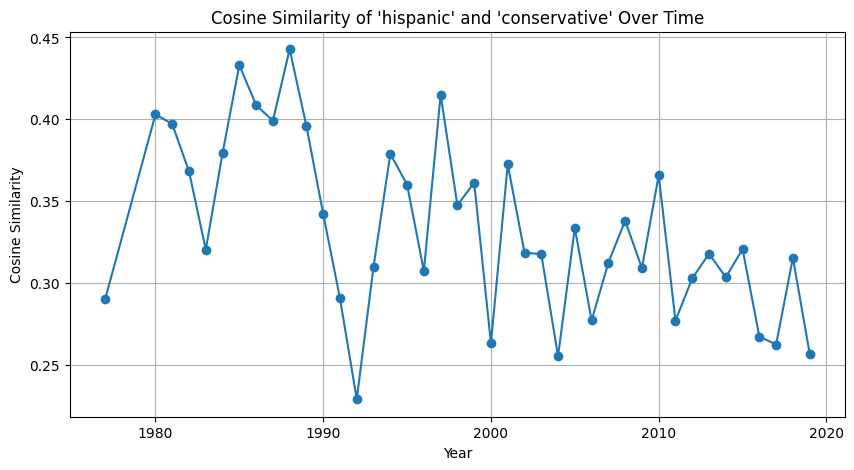

{1977: 0.2902264,
 1980: 0.4030235,
 1981: 0.3971769,
 1982: 0.368272,
 1983: 0.32045823,
 1984: 0.37931347,
 1985: 0.43305779,
 1986: 0.4087913,
 1987: 0.39909375,
 1988: 0.44280654,
 1989: 0.39587575,
 1990: 0.34222507,
 1991: 0.2908105,
 1992: 0.22918682,
 1993: 0.30996692,
 1994: 0.37895104,
 1995: 0.36015886,
 1996: 0.30746707,
 1997: 0.41502878,
 1998: 0.34757876,
 1999: 0.36139914,
 2000: 0.2632555,
 2001: 0.37250772,
 2002: 0.3186484,
 2003: 0.31770962,
 2004: 0.2554282,
 2005: 0.33372465,
 2006: 0.27725226,
 2007: 0.31250232,
 2008: 0.33814424,
 2009: 0.3092187,
 2010: 0.3658468,
 2011: 0.27717918,
 2012: 0.30290192,
 2013: 0.31803194,
 2014: 0.3036121,
 2015: 0.32083306,
 2016: 0.26744562,
 2017: 0.26249307,
 2018: 0.31554216,
 2019: 0.2570771}

In [16]:
cosine_similarity_over_years(
    word1="hispanic",
    word2="conservative",
    start_year=1900,
    end_year=2019,
    model_dir="/vast/edk202/NLP_corpora/Google_Books/20200217/eng-fiction/5gram_files/6corpus/yearly_files/models_final/norm_and_align/",
    plot=True
)

In [18]:
model = W2VModel("/vast/edk202/NLP_corpora/Google_Books/20200217/eng-fiction/5gram_files/6corpus/yearly_files/models_final/norm_and_align/w2v_y2019_wbdoc_freq_vs200_w5_mc40_sg1_e8.kv")

category1 = ["science", "technology", "chemistry"]
category2 = ["art", "literature", "poetry", "painting"]
target1 = ["man", "male", "boy", "father", "brother"]
target2 = ["woman", "female", "girl", "mother", "sister"]

weat_score = model.compute_weat(category1, category2, target1, target2)
print(f"WEAT effect size (Cohen's d): {weat_score:.4f}")

WEAT effect size (Cohen's d): 0.4388


In [7]:
category1 = ["good", "ideal", "wonderful", "excellent", "great", "fantastic", "amazing", "superb", "outstanding", "marvelous", "splendid", "brilliant", "fabulous", "terrific", "admirable", "commendable", "exemplary", "praiseworthy", "superior", "stellar", "notable", "positive", "advantageous", "desirable"]
category2 = ["bad", "evil", "destructive", "terrible", "horrible", "awful", "dreadful", "abysmal", "atrocious", "appalling", "ghastly", "wicked", "villainous", "corrupt", "harmful", "damaging", "unethical", "deplorable", "noxious", "pernicious", "heinous", "malevolent", "diabolical", "negative", "undesirable"]
#target1 = ["socialism", "socialist"]
#target2 = ["capitalism", "capitalist"]
target1 = ["collective"]
target2 = ["individual"]

compute_weat_over_years(
    category1,
    category2,
    target1,
    target2,
    start_year=1900,
    end_year=2019,
    model_dir="/vast/edk202/NLP_corpora/Google_Books/20200217/eng-fiction/5gram_files/6corpus/yearly_files/models_final/norm_and_align/",
    plot=True,
    smooth=True,
    sigma=5
)

Skipping 1900 due to error: Missing words in model vocabulary: ['stellar', 'abysmal', 'unethical']
Skipping 1901 due to error: Missing words in model vocabulary: ['stellar', 'abysmal', 'unethical']
Skipping 1902 due to error: Missing words in model vocabulary: ['stellar', 'damaging', 'unethical']
Skipping 1903 due to error: Missing words in model vocabulary: ['stellar', 'damaging', 'unethical']
Skipping 1904 due to error: Missing words in model vocabulary: ['stellar', 'unethical']
Skipping 1905 due to error: Missing words in model vocabulary: ['stellar', 'abysmal', 'damaging', 'unethical']
Skipping 1906 due to error: Missing words in model vocabulary: ['stellar', 'abysmal', 'unethical']
Skipping 1907 due to error: Missing words in model vocabulary: ['stellar', 'unethical']
Skipping 1908 due to error: Missing words in model vocabulary: ['stellar', 'unethical']
Skipping 1909 due to error: Missing words in model vocabulary: ['stellar', 'unethical']
Skipping 1910 due to error: Missing word

{}

In [ ]:
model = W2VModel("/vast/edk202/NLP_corpora/Google_Books/20200217/eng/5gram_files/6corpus/yearly_files/models/norm_and_align/w2v_y2019_wbnone_vs200_w5_mc20_sg1_e10.kv")

category1 = ["good", "ideal", "wonderful", "excellent", "great", "fantastic", "amazing", "superb", "outstanding", "marvelous", "splendid", "brilliant", "fabulous", "terrific", "admirable", "commendable", "exemplary", "praiseworthy", "superior", "stellar", "notable", "positive", "advantageous", "desirable"]
category2 = ["bad", "evil", "destructive", "terrible", "horrible", "awful", "dreadful", "abysmal", "atrocious", "appalling", "ghastly", "wicked", "villainous", "corrupt", "harmful", "damaging", "unethical", "deplorable", "noxious", "pernicious", "heinous", "malevolent", "diabolical", "negative", "undesirable"]
target1 = ["socialism", "socialist"]
target2 = ["capitalism", "capitalist"]

compute_weat_over_years(
    category1,
    category2,
    target1,
    target2,
    start_year=1900,
    end_year=2019,
    model_dir="/vast/edk202/NLP_corpora/Google_Books/20200217/eng/5gram_files/6corpus/yearly_files/models/norm_and_align/",
    plot=True,
    smooth=True,
    sigma=5
)